In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('./data/tradelog_IS.csv', index_col = 0)

In [2]:
df['open_time_fmt'] = pd.to_datetime(df['open_time']).dt.time

(array([235., 160., 141., 142., 113., 156., 150., 177., 206., 148., 111.,
        186., 223., 276., 304., 203., 162., 135., 154.,  78.,  66.,  90.,
        110., 141.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

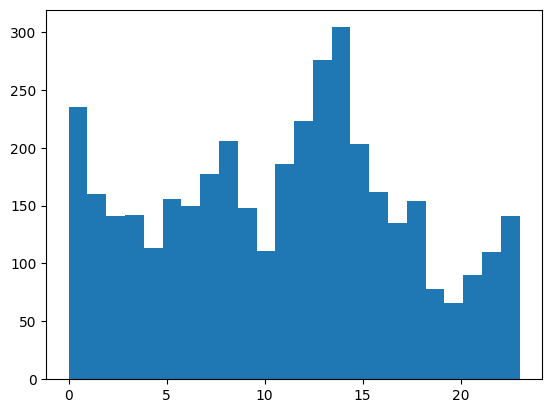

In [3]:
plt.hist(pd.to_datetime(df['open_time']).dt.hour, bins = 24)

In [4]:
df['time_in_trade'] = (pd.to_datetime(df['close_time']) - pd.to_datetime(df['open_time']))/pd.Timedelta(hours = 1)
df['time_in_trade'].mode()
# plt.hist(pd.to_datetime(df['open_time']).dt.hour, bins = 24)

0    7.583333
Name: time_in_trade, dtype: float64

(array([422., 469., 352., 348., 384., 202., 124., 118., 121.,  75., 112.,
         97.,  74.,  85.,  69.,  41.,  61.,  92.,  60.,  69.,  68.,  45.,
         21.,  19.,  22.,  22.,  20.,  26.,  16.,  23.,  15.,   7.,   6.,
          3.,   8.,  10.,   8.,   8.,   1.,   5.,   1.,   0.,   0.,   5.,
          5.,   2.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   2.,   4.,   0.,   9.,   8.,
          7.,  11.,   5.,   6.,   8.,   5.,   0.,   7.,  19.,   3.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   5.,  11.,   9.,   4.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.]),
 array([8.33333333e-02, 5.46916667e+00, 1.08550000e+01, 1.62408333e+01,
        2.16266667e+01, 2.70125000e+01, 3.23983333e+01, 3.77841667e+01,
        4.31700000e+01, 4.85558333e+01, 5.39416667e+01, 5.93275000e+01,
        6.47133333e+01, 7.00991667e+01, 7.54850000e+01, 8.08708333e+01,
        8.62566667e+01, 9.1642

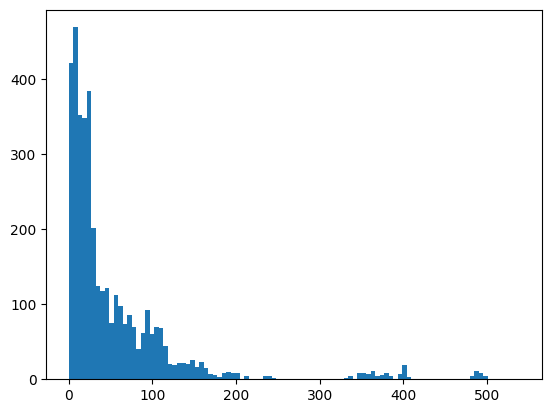

In [14]:
plt.hist(df['time_in_trade'], bins = 100)

In [6]:
hourly_summary = pd.DataFrame(index = [i for i in range(24)],columns = ['win_rate', 'PnL', 'no_trades'])



In [7]:
for h in hourly_summary.index:
    # print(h)
    dg = df[pd.to_datetime(df['open_time']).dt.hour == h]
    no_trades = len(dg)
    wins = len(dg[dg['PnL']>0])
    PnL = dg['PnL'].sum()
    dg

    if no_trades == 0:
        hourly_summary.loc[h,'win_rate'] = 0
    else:
        hourly_summary.loc[h,'win_rate'] = wins/no_trades
    
    hourly_summary.loc[h,'PnL']     = PnL
    hourly_summary.loc[h,'no_trades'] = no_trades


In [8]:
hourly_summary


,win_rate,PnL,no_trades
0,0.53617,5.540299,235
1,0.525,-0.389256,160
2,0.496454,-9.257246,141
3,0.56338,12.172068,142
4,0.539823,3.978528,113
5,0.5,-5.912924,156
6,0.513333,-2.14941,150
7,0.514124,-4.598084,177
8,0.524272,-2.327085,206
9,0.527027,0.652276,148


<BarContainer object of 24 artists>

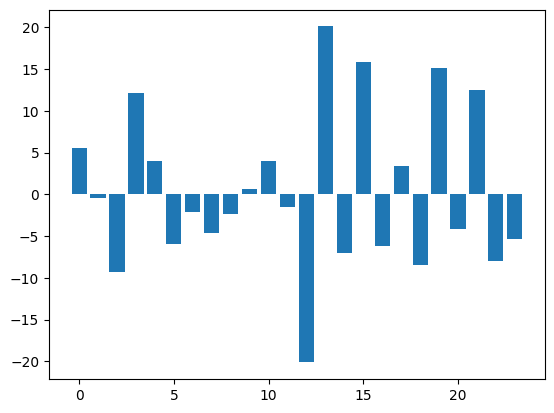

In [16]:
plt.bar(hourly_summary.index,hourly_summary['PnL'])

In [9]:
int(df['time_in_trade'].max())

538

In [18]:

time_in_trade_summary = pd.DataFrame(index = [i for i in range(int(df['time_in_trade'].max())) ], columns = ['win_rate','PnL','no_trades','prob','EV(t)'])

for h in time_in_trade_summary.index:
    # print(h)
    dg = df[df['time_in_trade'].astype(int) == h]
    # print(dg)

    no_trades = len(dg)
    wins = len(dg[dg['PnL']>0])
    PnL = dg['PnL'].sum()

    if no_trades == 0:
        time_in_trade_summary.loc[h,'win_rate'] = 0
    else:
        time_in_trade_summary.loc[h,'win_rate'] = wins/no_trades
    
    time_in_trade_summary.loc[h,'PnL']     = PnL
    time_in_trade_summary.loc[h,'no_trades'] = no_trades
    time_in_trade_summary.loc[h,'prob'] = no_trades/time_in_trade_summary['no_trades'].sum()



for h in time_in_trade_summary.index:
    dg = time_in_trade_summary[time_in_trade_summary.index >= h]
    time_in_trade_summary.loc[h,'EV(t)'] = (dg['prob']*dg['PnL']).sum()



In [19]:
t = time_in_trade_summary[time_in_trade_summary['no_trades']!= 0]
time_in_trade_summary.head(20)

,win_rate,PnL,no_trades,prob,EV(t)
0,0.717391,17.085611,92,1.0,22.034723
1,0.597222,6.910233,72,0.439024,4.949111
2,0.549296,0.534071,71,0.302128,1.915351
3,0.529412,-0.024657,68,0.224422,1.753993
4,0.547619,1.551205,84,0.217054,1.759526
5,0.592593,10.541158,81,0.173077,1.422831
6,0.54023,1.40332,87,0.156757,-0.4016
7,0.53211,1.30503,109,0.164157,-0.62158
8,0.473118,-9.557609,93,0.122853,-0.83581
9,0.549296,3.524544,71,0.085749,0.338375


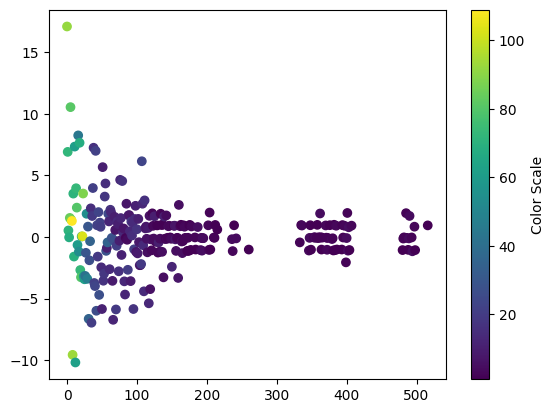

In [12]:
fig = plt.scatter(t.index,t['PnL'],c = t['no_trades'])
colorbar = plt.colorbar(fig)
colorbar.set_label('Color Scale')

<BarContainer object of 100 artists>

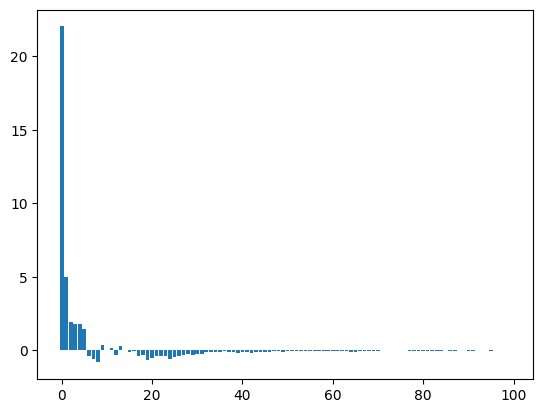

In [21]:
plt.bar(time_in_trade_summary.head(100).index,time_in_trade_summary['EV(t)'].head(100))